In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
# Statistic

# Number of persons
# Men vs women
# Number of images
# Min age
# Max age
# Avg number of images
# Avg number of age ranges

# Plots
# Distribution of age ranges

In [3]:
# Loading data

agedb_images = pd.read_csv("createdCSV/AgeDB_Cleaned_Images.csv", index_col=0)
agedb_individual = pd.read_csv("createdCSV/AgeDB_Cleaned_Individual.csv", index_col=0)

casia_images = pd.read_csv("createdCSV/CASIA_Cleaned_Images.csv", index_col=0)
casia_individual = pd.read_csv("createdCSV/CASIA_Cleaned_Individual.csv", index_col=0)

In [4]:
casia_images

,ID,Filename,Age,Gender,Age Range
0,2,000002_00000273.jpg,44.5,1,41-50
1,2,000002_00000274.jpg,46.0,1,41-50
2,2,000002_00000275.jpg,56.0,1,51-60
3,2,000002_00000276.jpg,31.5,1,31-40
4,2,000002_00000277.jpg,34.5,1,31-40
...,...,...,...,...,...
66078,10553,010553_00490111.jpg,36.0,1,31-40
66079,10553,010553_00490113.jpg,34.0,1,31-40
66080,10553,010553_00490114.jpg,34.5,1,31-40
66081,10553,010553_00490115.jpg,26.0,1,21-30


In [5]:
casia_individual

,ID,Min Age,Max Age,Age Span,Number of Age Ranges,Number of Images,Gender
0,2,31.0,69.0,38.0,4,60,1.0
1,17,22.5,47.5,25.0,3,36,0.0
2,24,17.0,83.0,66.0,7,187,1.0
3,29,21.5,74.0,52.5,6,88,1.0
4,30,20.0,77.0,57.0,6,64,1.0
...,...,...,...,...,...,...,...
1269,10497,9.5,45.0,35.5,4,37,1.0
1270,10541,24.5,56.0,31.5,4,30,1.0
1271,10545,23.0,60.0,37.0,4,30,1.0
1272,10546,27.0,43.5,16.5,3,42,1.0


In [6]:
# Number of persons
def num_pers(df_individual):
    return len(df_individual)

# Number of images
def num_images(df_images):
    return len(df_images)

# Min age
def min_age(df_images):
    return min(df_images["Age"].to_list())

# Max age
def max_age(df_images):
    return max(df_images["Age"].to_list())

# Average number of images
def avg_images(df_individual):
    return round(np.average(df_individual["Number of Images"].to_list()), 2)

# Average number of ranges
def avg_ranges(df_individual):
    return round(np.average(df_individual["Number of Age Ranges"].to_list()), 2)

# Counting men
def count_men(df_individual):
    gender_list = df_individual["Gender"].to_list()
    count = 0
    for i in gender_list:
        if i > 0.9:
            count += 1
    return count    

# Counting women
def count_women(df_individual):
    gender_list = df_individual["Gender"].to_list()
    count = 0
    for i in gender_list:
        if i < 0.1:
            count += 1
    return count   


In [10]:
#AgeDB
print("AgeDB basic stat")
print(f"Number of persons: {num_pers(agedb_individual)}")
print(f"Number of men: {count_men(agedb_individual)}")
print(f"Number of women: {count_women(agedb_individual)}")
print(f"Number of images: {num_images(agedb_images)}")
print(f"Min age: {min_age(agedb_images)}")
print(f"Max age: {max_age(agedb_images)}")
print(f"Average number of images: {avg_images(agedb_individual)}")
print(f"Average number of ranges: {avg_ranges(agedb_individual)}")


AgeDB basic stat
Number of persons: 274
Number of men: 166
Number of women: 108
Number of images: 9889
Min age: 3
Max age: 100
Average number of images: 36.09
Average number of ranges: 5.92


In [12]:
#CASIA
print("CASIA basic stat")
print(f"Number of persons: {num_pers(casia_individual)}")
print(f"Number of men: {count_men(casia_individual)}")
print(f"Number of women: {count_women(casia_individual)}")
print(f"Number of images: {num_images(casia_images)}")
print(f"Min age: {min_age(casia_images)}")
print(f"Max age: {max_age(casia_images)}")
print(f"Average number of images: {avg_images(casia_individual)}")
print(f"Average number of ranges: {avg_ranges(casia_individual)}")

CASIA basic stat
Number of persons: 1274
Number of men: 782
Number of women: 492
Number of images: 65684
Min age: 2.0
Max age: 90.0
Average number of images: 51.56
Average number of ranges: 4.24


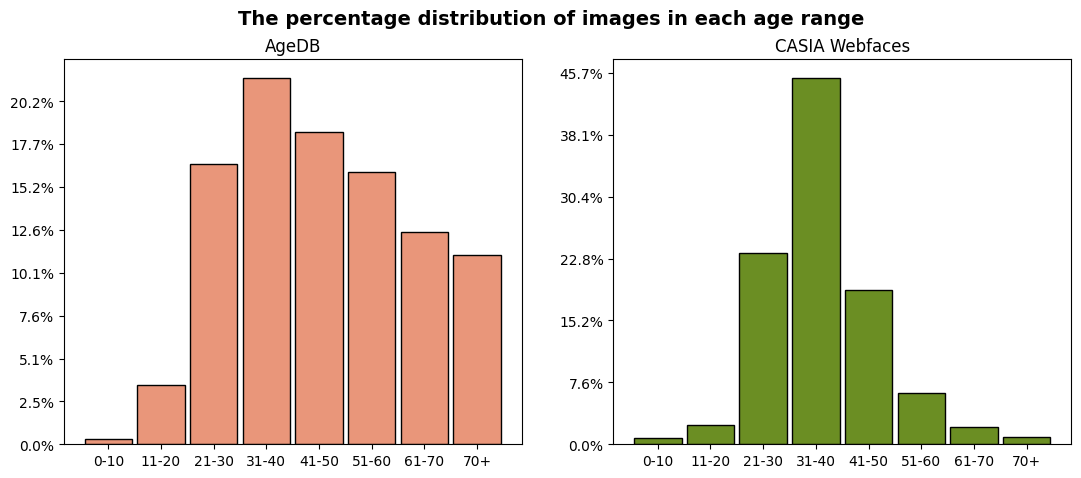

In [67]:
diff_ranges = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+']
x = np.arange(len(diff_ranges)) 

# AgeDB
agedb_ranges = agedb_images["Age Range"].to_list()
agedb_range_counter = [agedb_ranges.count(i) for i in diff_ranges]

# CASIA
casia_ranges = casia_images["Age Range"].to_list()
casia_range_counter = [casia_ranges.count(i) for i in diff_ranges]

# Plots
fig, axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(13)
fig.suptitle("The percentage distribution of images in each age range", fontweight ="bold", fontsize=14)
axs[0].bar(x, height=agedb_range_counter, ec='k', width=0.9, color='darksalmon')
axs[0].set_xticks(x, diff_ranges)
axs[0].set_title("AgeDB")
axs[0].yaxis.set_major_formatter(PercentFormatter(xmax=len(agedb_ranges)))
axs[1].bar(x, height=casia_range_counter, ec='k', width=0.9, color='olivedrab')
axs[1].set_xticks(x, diff_ranges)
axs[1].set_title("CASIA Webfaces")
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=len(casia_ranges)))
plt.show()